In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


In [4]:
data[['Time', 'Amount']] = StandardScaler().fit_transform(data[['Time', 'Amount']])

<AxesSubplot:>

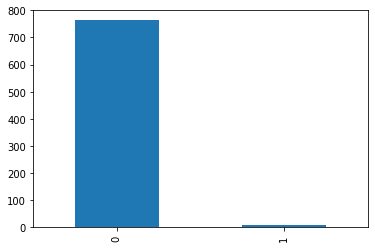

In [5]:
data.Class.value_counts().plot(kind='bar')

In [6]:
class_count_0, class_count_1 = data.Class.value_counts()

In [7]:
class0 = data[data.Class == 0]
class1 = data[data.Class == 1]
print(class0.shape, class1.shape)

(763, 31) (9, 31)


Under Sampling the class 0 data

In [8]:
class0_under =  class0.sample(class_count_1)
class0_under.shape

(9, 31)

In [9]:
sample1 = pd.concat([class0_under, class1], axis=0)
sample1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
490,0.442543,1.261597,0.256346,0.513254,0.619054,-0.472482,-0.989342,0.065431,-0.208781,0.035924,...,-0.257305,-0.739810,0.135646,0.376418,0.220320,0.094706,-0.028559,0.019023,-0.340793,0
294,-0.430957,-0.429224,0.698849,1.588982,1.297157,0.119331,0.214133,0.387461,0.276524,-0.483148,...,0.073325,0.324849,-0.102068,0.214137,-0.251234,-0.267044,0.169115,0.133832,-0.276558,0
264,-0.559070,0.066061,0.876263,1.093993,1.556151,-0.072318,-0.671902,0.569707,-0.143791,-0.609469,...,0.159757,0.497797,-0.043266,0.397923,-0.358151,-0.186331,0.135739,0.098840,-0.229368,0
149,-1.106464,-0.853807,0.127392,1.267277,0.678584,-1.029851,-0.487614,1.836071,-0.298566,-0.922127,...,0.252358,0.179725,0.476744,0.724705,0.526798,0.502701,-0.159465,0.002761,1.283555,0
275,-0.518307,-0.931154,0.825889,0.168008,-0.077212,2.966452,4.099506,-0.146901,-1.111251,-0.023183,...,1.317467,-0.700836,-0.217694,0.996480,0.292649,-0.317728,-0.221212,-0.300920,-0.317021,0


<AxesSubplot:>

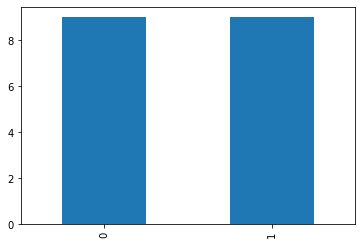

In [10]:
sample1.Class.value_counts().plot(kind='bar')

Over Sampling class 1 data

In [11]:
class1_over = class1.sample(class_count_0, replace=True)
class1_over.shape

(763, 31)

<AxesSubplot:>

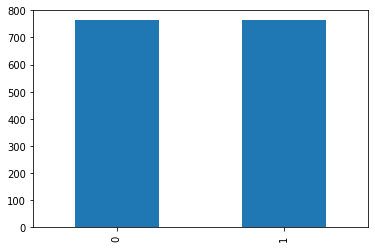

In [12]:
sample2 = pd.concat([class0, class1_over], axis=0)
sample2.Class.value_counts().plot(kind='bar')

Simple Random Sampling

In [13]:
z = 1.96
p = 0.1
e = 0.05

In [14]:
s_size = int(round((z**2 * p * (1-p)) / e**2, 0))
s_size

138

<AxesSubplot:>

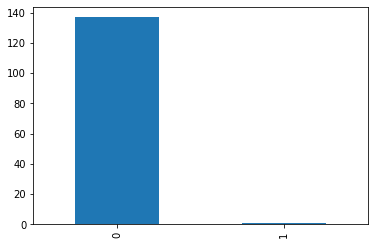

In [15]:
sample3 = data.sample(s_size)
sample3.Class.value_counts().plot(kind='bar')

Stratified Sampling

Cannot sample more than 9 as 1 has in total 9 occurances only

In [25]:
sample4_1 = data.groupby('Class').apply(lambda x: x.sample(7))

In [17]:
sample4_2 = data.groupby('Class', group_keys=False).apply(lambda x: x.sample(frac=0.3))

In [18]:
data.Class.value_counts(True)

0    0.988342
1    0.011658
Name: Class, dtype: float64

In [19]:
sample4_2.Class.value_counts(True)

0    0.987069
1    0.012931
Name: Class, dtype: float64

<AxesSubplot:>

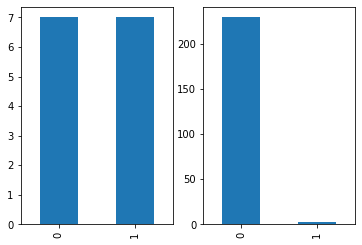

In [26]:
plt.subplots(1,2)
plt.subplot(1,2,1)
sample4_1.Class.value_counts().plot(kind='bar')
plt.subplot(1,2,2)
sample4_2.Class.value_counts().plot(kind='bar')

Creating Different Models

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [74]:
test_data = data.sample(30, random_state=11133)
x_test = test_data.drop(['Class'], axis=1)
y_test = test_data['Class']

In [75]:
y_test.value_counts()

0    28
1     2
Name: Class, dtype: int64

In [78]:
models = []
models.append(['LR', LogisticRegression()])
models.append(['NB', GaussianNB()])
models.append(['KNN', KNeighborsClassifier(n_neighbors=10)])
models.append(['SVM', SVC()])
models.append(['DT', DecisionTreeClassifier()])

In [79]:
models

[['LR', LogisticRegression()],
 ['NB', GaussianNB()],
 ['KNN', KNeighborsClassifier(n_neighbors=10)],
 ['SVM', SVC()],
 ['DT', DecisionTreeClassifier()]]

In [80]:
model_name = []

for name, model in models:
    model_name.append(name)

res_df = pd.DataFrame(model_name, columns=['models'], index=range(1,6))
res_df

,models
1,LR
2,NB
3,KNN
4,SVM
5,DT


In [81]:
samples = [sample1, sample2, sample3, sample4_1, sample4_2]

for i, sample in enumerate(samples):
    result = []
    for name, model in models:
        model.fit(sample.drop(['Class'], axis=1), sample.Class)
        res = accuracy_score(y_test, model.predict(x_test))
        result.append(res)
    res_df[f"Sample{i+1}"] = result

In [82]:
res_df

,models,Sample1,Sample2,Sample3,Sample4,Sample5
1,LR,0.533333,0.900000,0.933333,0.533333,0.933333
2,NB,0.466667,0.900000,0.933333,0.700000,0.900000
3,KNN,0.900000,0.966667,0.933333,0.966667,0.933333
4,SVM,0.600000,1.000000,0.933333,0.500000,0.933333
5,DT,0.600000,1.000000,0.933333,0.500000,0.900000


In [106]:
mean_score = pd.DataFrame(res_df.iloc[:, 1:].apply(lambda x: np.mean(x)), columns=['Mean_score'])
mean_score

,Mean_score
Sample1,0.620000
Sample2,0.953333
Sample3,0.933333
Sample4,0.640000
Sample5,0.920000


So OverSampling performs better overall for all models, Simple random sampling comes second and Proportionate Stratified Sampling comes third